# Домашнее задание 2

В этом задании:

1. Сделаем регрессию над данными через scikit-learn: сначала через регресию, потом через бустинг.
2. Сравним результаты с константным предсказанием.
3. Сделаем нейронную сеть на полносвязных слоях, обучим над теми же данными - и сравним с лин. регрессией и бустингом.



In [87]:
import pandas as pd
import numpy as np
import torch
import random

# Для воспроизводимости
seed = 0
np.random.seed(seed)
random.seed(seed)

In [76]:
df = pd.read_csv("insurance.csv")

### Задание №1:
Cделайте train/test split на данных в пропорции 0.8/0.2, залейте в лмс код, который в `df_train`, `df_test`
сохранит датафрейм с тренировочными и тестовыми данными соответственно.

P.S Использовать train_test_split из scikit-learn запрещено - разбивайте вручную через индексы.

In [43]:
df.shape[0]*0.80

1070.4

In [45]:
df.loc[:10]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [18]:
df_len = df.shape[0]
train_size = int(df_len*0.8)
# test_size = df_len - train_size

df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

In [41]:
df_train.tail()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1333,50,30.97,3,10600.5483,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.92,0,2205.9808,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.85,0,1629.8335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.80,0,2007.9450,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1337,61,29.07,0,29141.3603,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [78]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
967,44,male,25.365,1,no,northwest,7518.02535
274,25,male,27.550,0,no,northwest,2523.16950
860,37,female,47.600,2,yes,southwest,46113.51100
43,37,female,30.800,2,no,southeast,6313.75900
1107,50,female,26.220,2,no,northwest,10493.94580


In [77]:
# решение LMS
idx_test = np.random.randint(0, df.shape[0], int(0.2 * df.shape[0]))
df_test = df.iloc[idx_test]
df_train = df.drop(index=idx_test)

In [ ]:
## получилось разбиение не совсем 80 на 20 из-за повторения индексов
df_train.shape[0] / df_test.shape[0]

4.108614232209738

In [33]:
idx_test.shape, len(set(idx_test))

((267,), 241)

### Задание №2:
Выполните one-hot кодирование для категориальных признаков ``sex, region, smoker`` как в обучающем (``df_train``), так и в тестовом (``df_test``) датасетах.   
После кодирования указанные признаки должны быть заменены на соответствующие бинарные столбцы. Остальные признаки датафреймов должны остаться без изменений.


In [36]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], dtype=float)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [79]:
df_train = pd.get_dummies(df_train, columns=["sex", "smoker", "region"], dtype=float)
df_test = pd.get_dummies(df_test, columns=["sex", "smoker", "region"], dtype=float)

print(df_train.columns)
print(df_train.columns)

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')
Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


### Задание №4:
Нормализуйте колонки, которые вы отметили в квизе.
Считайте, что исходные датафреймы сохранены в `df_train` и `df_test`.

Сдайте код, который модифицирует `df_train` и `df_test` так, чтобы численные колонки из прошлого пункта стали нормированы.

In [ ]:
df_train_norm = df_train[["age", "bmi", "charges"]]
df_train_norm.describe().loc[["mean", "std"]]


,age,bmi,charges
mean,39.022789,30.754613,12989.354622
std,14.074827,6.067250,12013.331806


In [ ]:
# можно вызовом прямых методов
df_train_norm.std(), df_train_norm.mean()

age           14.074827
bmi            6.067250
charges    12013.331806
dtype: float64

In [68]:
df_train_norm - df_train_norm.describe().loc["mean"]

,age,bmi,charges
0,-20.022789,-2.854613,3895.569378
1,-21.022789,3.015387,-11263.802322
2,-11.022789,2.245387,-8539.892622
3,-6.022789,-8.049613,8995.115988
4,-7.022789,-1.874613,-9122.499422
...,...,...,...
1333,10.977211,0.215387,-2388.806322
1334,-21.022789,1.165387,-10783.373822
1335,-21.022789,6.095387,-11359.521122
1336,-18.022789,-4.954613,-10981.409622


In [ ]:
# Мое решение
columns = ["age", "bmi", "charges"]
mean, std = df_train[columns].mean(), df_train[columns].std()

for df in [df_train, df_test]:
    df[columns] = (df[columns] - mean) / std

In [81]:
df_train.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1,-1.522827,0.519643,1,-0.955267,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.814970,0.393507,3,-0.728440,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.531827,-0.281398,0,-0.776955,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
5,-0.602613,-0.795768,0,-0.786135,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0.459173,0.465585,1,-0.412744,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# решеие LMS
num_cols = ["age", "bmi", "charges"]
train_mean = df_train[num_cols].mean()
train_std = df_train[num_cols].std()
df_train[num_cols] = (df_train[num_cols] - train_mean) / train_std
df_test[num_cols] = (df_test[num_cols] - train_mean) / train_std

y_train = df_train.pop("charges")
y_test = df_test.pop("charges")

### Задание №5
Реализуйте функцию, считающую `MSE` метрику.

Ваша функция должна уметь принимать torch.Tensor, numpy-массивы и pd.Series.

In [89]:
t = torch.tensor([1, 2, 3])
t.numpy()

array([1, 2, 3], dtype=int64)

In [86]:
x = pd.Series({100:1, 101:2, 102:3})
x.to_numpy()

array([1, 2, 3], dtype=int64)

In [120]:
# проверка на разных типах данных
t = torch.tensor([1, 2, 3])
x = pd.Series({100:1, 101:2, 102:3})
a = np.array([1, 2, 3])
np.array(t, dtype=float)

array([1., 2., 3.])

In [121]:
def metric(preds, y):
    np_preds = np.array(preds, dtype=float) 
    np_y = np.array(y, dtype=float)
    return ((np_preds - np_y)**2).sum()/np_preds.shape[0]

In [122]:
y = torch.tensor([2, 2, 2], dtype=float)
metric(t, y)

0.6666666666666666

In [127]:
preds = [0.43, 0.33, 0.59, 0.35, 0.47]
y = [0.69, 0.93, 0.18, 1., 0.51]
metric(preds, y)

0.20396000000000006

In [124]:
def metric(preds, y):
    # Преобразуем входные данные в numpy массивы
    if isinstance(preds, torch.Tensor):
        np_preds = preds.detach().cpu().numpy().astype(float)
    elif isinstance(preds, pd.Series):
        np_preds = preds.values.astype(float)
    else:
        np_preds = np.array(preds, dtype=float)
    
    if isinstance(y, torch.Tensor):
        np_y = y.detach().cpu().numpy().astype(float)
    elif isinstance(y, pd.Series):
        np_y = y.values.astype(float)
    else:
        np_y = np.array(y, dtype=float)
    
    # Проверяем одинаковую длину массивов
    if len(np_preds) != len(np_y):
        raise ValueError(f"Размеры preds ({len(np_preds)}) и y ({len(np_y)}) не совпадают")
    
    # Вычисляем MSE
    mse = np.mean((np_preds - np_y) ** 2)
    
    # Возвращаем скалярное значение
    return float(mse)

In [126]:
import numpy as np

def metric(preds, y):
    # Простое и надежное преобразование в numpy массивы
    np_preds = np.asarray(preds, dtype=float).flatten()
    np_y = np.asarray(y, dtype=float).flatten()
    
    # Вычисляем MSE
    mse = np.mean((np_preds - np_y) ** 2)
    
    # Возвращаем Python float
    return float(mse)

In [138]:
import numpy as np

def metric(preds, y):
    # преобразование в numpy array
    np_preds = np.asarray(preds, dtype=float)
    np_y = np.asarray(y, dtype=float)
    
    return torch.tensor(((np_preds - np_y) ** 2).mean())

In [ ]:
import numpy as np
import pandas as pd
import torch

def metric(preds, y):
    try:
        # Преобразуем входные данные в numpy массивы
        if isinstance(preds, torch.Tensor):
            np_preds = preds.detach().cpu().numpy()
        elif isinstance(preds, pd.Series):
            np_preds = preds.values
        else:
            np_preds = np.array(preds)
        
        if isinstance(y, torch.Tensor):
            np_y = y.detach().cpu().numpy()
        elif isinstance(y, pd.Series):
            np_y = y.values
        else:
            np_y = np.array(y)
        
        # Убедимся, что это одномерные массивы
        np_preds = np.array(np_preds, dtype=float).flatten()
        np_y = np.array(np_y, dtype=float).flatten()
        
        # Проверяем одинаковую длину массивов
        if len(np_preds) != len(np_y):
            raise ValueError(f"Размеры preds ({len(np_preds)}) и y ({len(np_y)}) не совпадают")
        
        # Вычисляем MSE
        mse = ((np_preds - np_y) ** 2).mean()
        
        # Возвращаем Python float, а не numpy float
        return float(mse)
        
    except Exception as e:
        # Для отладки: выводим информацию о типах
        print(f"Ошибка: {e}")
        print(f"preds тип: {type(preds)}, значение: {preds}")
        print(f"y тип: {type(y)}, значение: {y}")
        raise

In [139]:
preds = pd.Series([0.43, 0.33, 0.59, 0.35, 0.78])
y = [0.69, 0.93, 0.18, 1., 0.51]
metric(preds, y)

tensor(0.2182, dtype=torch.float64)

In [47]:
def metric(preds, y):
    return ((preds - y) ** 2).mean()

In [ ]:
import numpy as np
import torch

def metric(preds, y):
    np_preds = np.asarray(preds, dtype=float)
    np_y = np.asarray(y, dtype=float)
    
    mse = np.mean((np_preds - np_y) ** 2)
    return torch.tensor(mse)

In [156]:
preds = pd.Series([0.43, 0.33, 0.59, 0.35, 0.78])
# preds = torch.tensor([0.43, 0.33, 0.59, 0.35, 0.78])
y = torch.tensor([0.69, 0.93, 0.18, 1., 0.51])
# preds = np.array([0.43, 0.33, 0.59, 0.35, 0.78])
# y = np.array([0.69, 0.93, 0.18, 1., 0.51])
metric(preds, y)

# preds

0.21822000132560732

### Задание №6
Реализуйте бейзлайн на `LinearRegression` и `GradientBoostingRegressor`, отправьте метрики на _тестовой выборке_ в ЛМС.

Используйте гиперпараметры по-умолчанию в обоих моделях.

In [1]:
import pandas as pd
import numpy as np
import torch
import random

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Для воспроизводимости
seed = 0
np.random.seed(seed)
random.seed(seed)

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# разбиваем на train and test
idx_test = np.random.choice(df.shape[0], size=int(0.2 * df.shape[0]), replace=False)
df_test = df.iloc[idx_test]
df_train = df.drop(index=idx_test)

In [4]:
# one-hot для категориальных feature
df_train = pd.get_dummies(df_train, columns=["sex", "smoker", "region"], dtype=float)
df_test = pd.get_dummies(df_test, columns=["sex", "smoker", "region"], dtype=float)

In [5]:
# нормализация вещественных feature
columns = ["age", "bmi", "charges"]
mean, std = df_train[columns].mean(), df_train[columns].std()

for df_ in [df_train, df_test]:
    df_[columns] = (df_[columns] - mean) / std

y_train = df_train.pop("charges")
y_test = df_test.pop("charges")

In [41]:
def metric(preds, y):
    np_preds = np.asarray(preds, dtype=float)
    np_y = np.asarray(y, dtype=float)
    
    mse = np.mean((np_preds - np_y) ** 2)
    return mse

In [6]:
df_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.427091,-0.456256,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.788033,0.368152,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.433000,-1.296022,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.504007,-0.297840,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.490084,0.439278,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [7]:
y_train.shape

(1071,)

In [ ]:
# модель linear regression
LR = LinearRegression()
LR.fit(df_train, y_train)
y_train_pred = LR.predict(df_train)
y_test_pred = LR.predict(df_test)
print(metric(y_test_pred, y_test))
print(metric(y_train_pred, y_train))

0.2241176407784759
0.26279643579323897


In [ ]:
# модель gradient boosting regression
GBR = GradientBoostingRegressor()
GBR.fit(df_train, y_train)
y_train_pred = GBR.predict(df_train)
y_test_pred = GBR.predict(df_test)
print(metric(y_test_pred, y_test))
print(metric(y_train_pred, y_train))

0.114906605210456
0.1019945810265259


### Задание №7
Вычислите среднее значение целевой переменной на тренировочной выборке (train).

Подсчитайте MSE при константном предсказании этим средним и отправьте его в ЛМС.

In [36]:
metric(y_test, y_train.mean())

1.1145089956822458

### Задание №8
Создайте сеть, состоящую из одного слоя Linear, залейте в лмс код, который в `model` запишет вашу модель

В качестве признаков используйте все колонки в текущем датасете, за исключением таргета

In [8]:
df_train.head().columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [9]:
df_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.427091,-0.456256,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.788033,0.368152,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.433000,-1.296022,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.504007,-0.297840,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.490084,0.439278,1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1332,0.916123,2.259443,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1333,0.774110,0.040005,3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.498098,0.193572,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1336,-1.285078,-0.795719,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [25]:
t_train_features = torch.from_numpy(df_train.to_numpy(dtype="float32"))
t_train_features

tensor([[-1.4271, -0.4563,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [-0.7880,  0.3682,  3.0000,  ...,  0.0000,  1.0000,  0.0000],
        [-0.4330, -1.2960,  0.0000,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [-1.4981,  0.1936,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-1.2851, -0.7957,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [ 1.5552, -0.2671,  0.0000,  ...,  1.0000,  0.0000,  0.0000]])

In [10]:
import torch

torch.random.manual_seed(seed)
t_x_train = torch.from_numpy(df_train.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_train = torch.from_numpy(y_train.to_numpy()).to(dtype=torch.float32)

In [11]:
import torch.nn as nn

class SimpleModel(nn.Module):
    # В __init__ объявим все слои, которые нам нужны
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(in_features=11, out_features=1)

    def forward(self, x: torch.Tensor):
        x = self.linear_1(x)
        return x 

model = SimpleModel()
# model(t_x_train[[0, 1]])

In [40]:
model.parameters()

<generator object Module.parameters at 0x000001B1DCE057E0>

In [ ]:
# решение из LMS
def build_model():
    return nn.Linear(in_features=11, out_features=1)

model = build_model()

### Задание №9
Напишите функцию `train_loop`, которая будет учить модель по данным на 2к итераций.
Считайте, что данные уже хранятся в переменных `t_x_train`, `t_y_train`.
Ваша функция `train_loop` должна вернуть список из лоссов на каждой итерации (т.е. список длины 2000).

Используйте `learning_rate=1e-2` в оптимизаторе.

Для простоты за одну итерацию делайте проход вперед и проход назад на всех наших обучающих данных.
Это будет полный градиентный спуск (не по батчам) - можем себе позволить, данных немного.

_Подсказка 1_: Вам не обязательно учить модель на видеокарте, CPU будет достаточно.

_Подсказка 2_: `tqdm` - это библиотека, которая рисует прогресс итераций

In [28]:
import tqdm
from torch.optim.sgd import SGD

model = SimpleModel()
reg_optimizer = SGD(params=model.parameters(), lr=1e-2)

torch.random.manual_seed(seed)
t_x_train = torch.from_numpy(df_train.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_train = torch.from_numpy(y_train.to_numpy()).to(dtype=torch.float32)
criterion = nn.MSELoss()

def train_loop(model: nn.Module) -> list[float]:
    losses = []

    for _ in tqdm.trange(2000):
        reg_optimizer.zero_grad()
        output = model(t_x_train).squeeze(1)
        loss = criterion(output, t_y_train)
        loss.backward()
        losses.append(loss.item())
        reg_optimizer.step()
    return losses

losses = train_loop(model)

100%|██████████| 2000/2000 [00:00<00:00, 2100.60it/s]


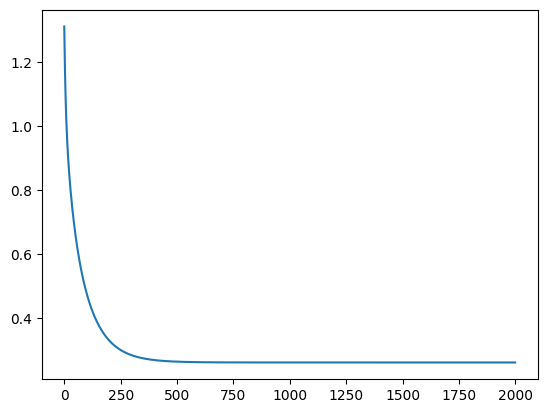

In [29]:
from matplotlib import pyplot as plt

plt.plot(losses)

In [32]:
# Решение LSM
import tqdm
from torch.optim.sgd import SGD
model = SimpleModel()

def train_loop(model: nn.Module) -> list[float]:
    losses = []
    optim = SGD(model.parameters(), lr=1e-2)
    criterion = nn.MSELoss()
    for _ in tqdm.trange(2000):
        optim.zero_grad()
        out = model(t_x_train)[:, 0]
        loss = criterion(out, t_y_train)
        loss.backward()
        losses.append(loss.item())
        optim.step()

    return losses

losses = train_loop(model)

100%|██████████| 2000/2000 [00:01<00:00, 1613.80it/s]


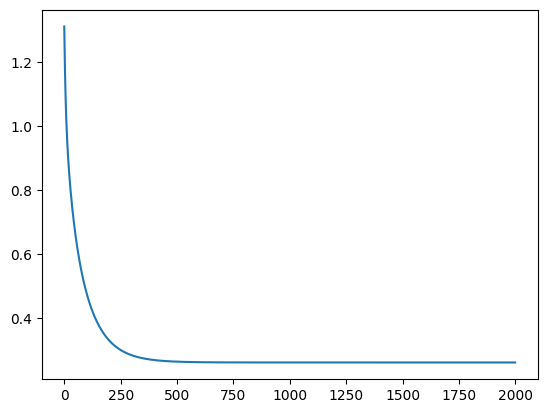

In [33]:
plt.plot(losses)

### Задание №10
Обучите модель, состоящую из одного слоя `Linear`.
Приложите в ЛМС метрику `MSE` на тестовых данных.
Используйте `learning_rate=1e-2` в оптимизаторе.

Когда будете тестировать, не забудьте перенести тестовые данные в `torch.Tensor`

In [35]:
t_x_test = torch.from_numpy(df_test.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_test = torch.from_numpy(y_test.to_numpy()).to(dtype=torch.float32)

In [36]:
# Считаем финальную метрику на тестовых данных
criterion = nn.MSELoss()
with torch.no_grad():
    # Помним, что все тензоры должны быть на одном устройстве
    out = model(t_x_test).squeeze(1)
    mse_loss = criterion(out, t_y_test)
    print("Финальный MSE-лосс:", mse_loss)


Финальный MSE-лосс: tensor(0.2228)


In [ ]:
# вариант LSM
t_x_test = torch.from_numpy(df_test.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_test = torch.from_numpy(y_test.to_numpy()).to(dtype=torch.float32)

model = build_model()
train_loop(model)
with torch.no_grad():
    y_pred = model(t_x_test)[:, 0]
metric(y_pred, t_y_test)

### Задание №11
Вам необходимо усложнить существующую нейронную сеть, добавив один скрытый слой.

Используйте следующие параметры:

Размерность скрытого слоя: 6 нейронов, функция активации -  `ReLU`

Приложите в лмс код, который в переменную `model` запишет вашу модель

In [2]:
import pandas as pd
import numpy as np
import torch

# Для воспроизводимости
seed = 0
np.random.seed(seed)
df = pd.read_csv("insurance.csv")

# разбиваем на train and test
idx_test = np.random.choice(df.shape[0], size=int(0.2 * df.shape[0]), replace=False)
df_test = df.iloc[idx_test]
df_train = df.drop(index=idx_test)

# one-hot для категориальных feature
df_train = pd.get_dummies(df_train, columns=["sex", "smoker", "region"], dtype=float)
df_test = pd.get_dummies(df_test, columns=["sex", "smoker", "region"], dtype=float)

# нормализация вещественных feature
columns = ["age", "bmi", "charges"]
mean, std = df_train[columns].mean(), df_train[columns].std()

for df_ in [df_train, df_test]:
    df_[columns] = (df_[columns] - mean) / std

# извлечение целевого признака
y_train = df_train.pop("charges")
y_test = df_test.pop("charges")

# переводим в тензоры
torch.random.manual_seed(seed)
t_x_train = torch.from_numpy(df_train.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_train = torch.from_numpy(y_train.to_numpy()).to(dtype=torch.float32)

In [7]:
import torch.nn as nn

# class SecondModel(nn.Module):
#     # В __init__ объявим все слои, которые нам нужны
#     def __init__(self):
#         super().__init__()
#         self.linear_1 = nn.Linear(in_features=11, out_features=6)
#         self.act_1 = nn.ReLU()
#         self.linear_2 = nn.Linear(in_features=6, out_features=1)

#     def forward(self, x: torch.Tensor):
#         x = self.linear_1(x)
#         x = self.act_1(x)
#         x = self.linear_2(x)
#         return x 

class SecondModel(nn.Module):
    # В __init__ объявим все слои, которые нам нужны
    def __init__(self):
        super().__init__()
        self.transform = nn.Sequential(
            nn.Linear(in_features=11, out_features=6),
            nn.ReLU(),
            nn.Linear(in_features=6, out_features=1))

    def forward(self, x: torch.Tensor):
        return self.transform(x).squeeze(1)

model = SecondModel()
model(t_x_train[[0, 1]])

tensor([0.2182, 0.0371], grad_fn=<SqueezeBackward1>)

In [13]:
import tqdm
from torch.optim.sgd import SGD

model = SecondModel()
reg_optimizer = SGD(params=model.parameters(), lr=1e-2)
criterion = nn.MSELoss()

def train_loop(model: nn.Module) -> list[float]:
    losses = []

    for _ in tqdm.trange(2000):
        reg_optimizer.zero_grad()
        output = model(t_x_train)
        loss = criterion(output, t_y_train)
        loss.backward()
        losses.append(loss.item())
        reg_optimizer.step()
    return losses

losses = train_loop(model)

100%|██████████| 2000/2000 [00:01<00:00, 1267.42it/s]


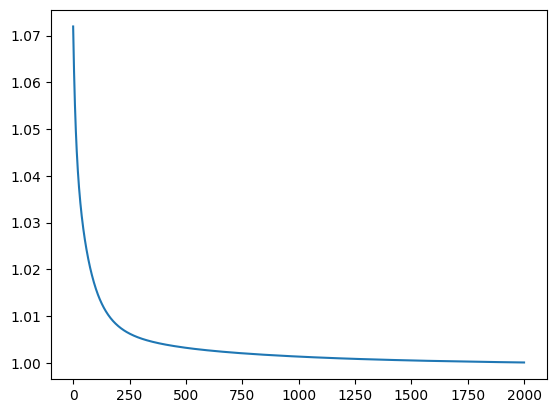

In [12]:
from matplotlib import pyplot as plt

plt.plot(losses)

In [ ]:
# Вариант для LMS
import torch.nn as nn
import torch

def build_model():
    return nn.Sequential(nn.Linear(in_features=11, out_features=6),
                        nn.ReLU(),
                        nn.Linear(in_features=6, out_features=1))

model = build_model()

### Задание №12
Приложите в ЛМС метрику качества этой сети после 2к итераций обучения.
Эту модель можно обучить на CPU, не обязательно на видеокарте.

Используйте для обучения ту же функцию `train_loop` с теми же параметрами (`learning rate`, число итераций и т.п.)

In [17]:
t_x_test = torch.from_numpy(df_test.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_test = torch.from_numpy(y_test.to_numpy()).to(dtype=torch.float32)

# Считаем финальную метрику на тестовых данных
criterion = nn.MSELoss()
with torch.no_grad():
    # Помним, что все тензоры должны быть на одном устройстве
    out = model(t_x_test)
    mse_loss = criterion(out, t_y_test)
    print("Финальный MSE-лосс:", mse_loss)

Финальный MSE-лосс: tensor(0.1399)


### Задание №13
Добавьте дополнительные слои в нейронную сеть

Вам необходимо усложнить нейронную сеть, добавив еще 2-3 скрытых слоя с такими же размерностями, как в предыдущем задании.

Приложите в лмс код, который в переменную `model` запишет вашу модель

In [ ]:
# Вариант для LMS
import torch.nn as nn
import torch

def build_model():
    return nn.Sequential(nn.Linear(in_features=11, out_features=6),
                        nn.ReLU(),
                        nn.Linear(in_features=6, out_features=6),
                        nn.ReLU(),
                        nn.Linear(in_features=6, out_features=1))

model = build_model()

### Задание №14
Приложите в ЛМС метрику качества после 2к итераций обучения.

Используйте для обучения ту же функцию `train_loop` с теми же параметрами (`learning rate`, число итераций и т.п.)

Эту модель можно обучить на CPU, не обязательно на видеокарте.

In [7]:
# все решение от начала до конца Первая часть - подготовка данных
import pandas as pd
import numpy as np
import torch

# Для воспроизводимости
seed = 0
np.random.seed(seed)
df = pd.read_csv("insurance.csv")

# разбиваем на train and test
idx_test = np.random.choice(df.shape[0], size=int(0.2 * df.shape[0]), replace=False)
df_test = df.iloc[idx_test]
df_train = df.drop(index=idx_test)

# one-hot для категориальных feature
df_train = pd.get_dummies(df_train, columns=["sex", "smoker", "region"], dtype=float)
df_test = pd.get_dummies(df_test, columns=["sex", "smoker", "region"], dtype=float)

# нормализация вещественных feature
columns = ["age", "bmi", "charges"]
mean, std = df_train[columns].mean(), df_train[columns].std()

for df_ in [df_train, df_test]:
    df_[columns] = (df_[columns] - mean) / std

# извлечение целевого признака
y_train = df_train.pop("charges")
y_test = df_test.pop("charges")

# переводим в тензоры
torch.random.manual_seed(seed)
t_x_train = torch.from_numpy(df_train.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_train = torch.from_numpy(y_train.to_numpy()).to(dtype=torch.float32)
t_x_test = torch.from_numpy(df_test.to_numpy().astype(float)).to(dtype=torch.float32)
t_y_test = torch.from_numpy(y_test.to_numpy()).to(dtype=torch.float32)

100%|██████████| 2000/2000 [00:02<00:00, 936.57it/s] 


Финальный MSE-лосс: tensor(0.1353)


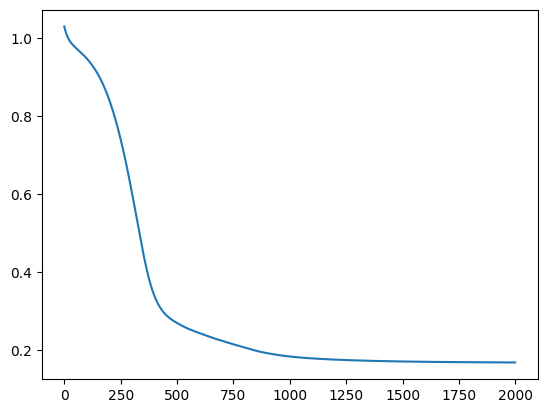

In [8]:
# построение, обучение и тестирование нейросети
import torch.nn as nn
import tqdm
from torch.optim.sgd import SGD
from matplotlib import pyplot as plt

class ThirdModel(nn.Module):
    # В __init__ объявим все слои, которые нам нужны
    def __init__(self):
        super().__init__()
        self.transform = nn.Sequential(
            nn.Linear(in_features=11, out_features=6),
            nn.ReLU(),
            nn.Linear(in_features=6, out_features=6),
            nn.ReLU(),
            nn.Linear(in_features=6, out_features=1))

    def forward(self, x: torch.Tensor):
        return self.transform(x).squeeze(1)

model = ThirdModel()

reg_optimizer = SGD(params=model.parameters(), lr=1e-2)
criterion = nn.MSELoss()

def train_loop(model: nn.Module) -> list[float]:
    losses = []

    for _ in tqdm.trange(2000):
        reg_optimizer.zero_grad()
        output = model(t_x_train)
        loss = criterion(output, t_y_train)
        loss.backward()
        losses.append(loss.item())
        reg_optimizer.step()
    return losses

losses = train_loop(model)
plt.plot(losses)

# Считаем финальную метрику на тестовых данных
criterion = nn.MSELoss()
with torch.no_grad():
    # Помним, что все тензоры должны быть на одном устройстве
    out = model(t_x_test)
    mse_loss = criterion(out, t_y_test)
    print("Финальный MSE-лосс:", mse_loss)